<h1>Импорт библиотек

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
import numpy as np

def sum_prod(X, V):
    result = sum(np.dot(matrix, vector) for matrix, vector in zip(X, V))
    return result

# Исходные данные
X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
V = [np.array([[1], [2]]), np.array([[3], [4]])]

# Тесты
def test_np():
    # Тест 1
    assert np.all(sum_prod(X, V) == np.array([[44], [64]]))

    # Тест 2: Пример с другими матрицами и векторами
    X2 = [np.array([[1, 0], [0, 1]]), np.array([[2, 3], [4, 5]])]
    V2 = [np.array([[1], [1]]), np.array([[1], [1]])]
    assert np.all(sum_prod(X2, V2) == np.array([[6], [10]]))


# Запуск тестов
test_np()
print('Все тесты пройдены')

Все тесты пройдены


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

# Тесты
def test_binarize():
    # Тест 1
    M = np.array([[0.3, 0.4], [0.6, 0.7]])
    assert np.all(np.array([[0, 0], [1, 1]]) == binarize(M, 0.5))

    # Тест 2
    M = np.array([[1, 2], [3, 4]])
    assert np.all(np.array([[1, 1], [1, 1]]) == binarize(M, 0.5))

    # Тест 3
    M = np.array([[0.5, 0.5], [0.5, 0.5]])
    assert np.all(np.array([[0, 0], [0, 0]]) == binarize(M, 0.5))

    # Тест 4
    M = np.array([[1, 2], [3, 4]])
    assert np.all(np.array([[0, 0], [0, 0]]) == binarize(M, 5))

# Запуск тестов
test_binarize()
print('Все тесты пройдены')

Все тесты пройдены


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [12]:
def unique_rows(matrix):
    return [list(set(row)) for row in matrix]

def unique_columns(matrix):
    return unique_rows(zip(*matrix))


def test_unique_elements():
    matrix = [
        [9, 5, 2, 9],
        [4, 5, 1, 1],
        [6, 3, 5, 9]
    ]
    expected_rows = [[9, 2, 5], [1, 4, 5], [9, 3, 5, 6]]
    expected_columns = [[9, 4, 6], [3, 5], [1, 2, 5], [9, 1]]

    assert unique_rows(matrix) == expected_rows
    assert unique_columns(matrix) == expected_columns

# запуск тестов
if __name__ == '__main__':
    test_unique_elements()
    print('Все тесты пройдены')

Все тесты пройдены


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Среднее значение по столбцам: [-0.29048587  0.75760971  0.09636864 -0.61182149  0.47537315  0.16965946
  0.42439997 -0.62958698  0.37159485]
Среднее значение по строкам: [ 0.05969825 -0.33002411  0.35211846  0.20330525  0.49703124  0.29492354
 -0.1514121  -0.24731927]
Дисперсия по столбцам: [1.66312824 0.84327519 0.73282536 1.29861183 0.7152913  0.84925473
 1.38336054 0.54975662 0.87439124]
Дисперсия по строкам: [1.92053638 1.07760559 0.79624236 1.46430741 0.92265589 0.85766271
 0.92035221 1.05246155]


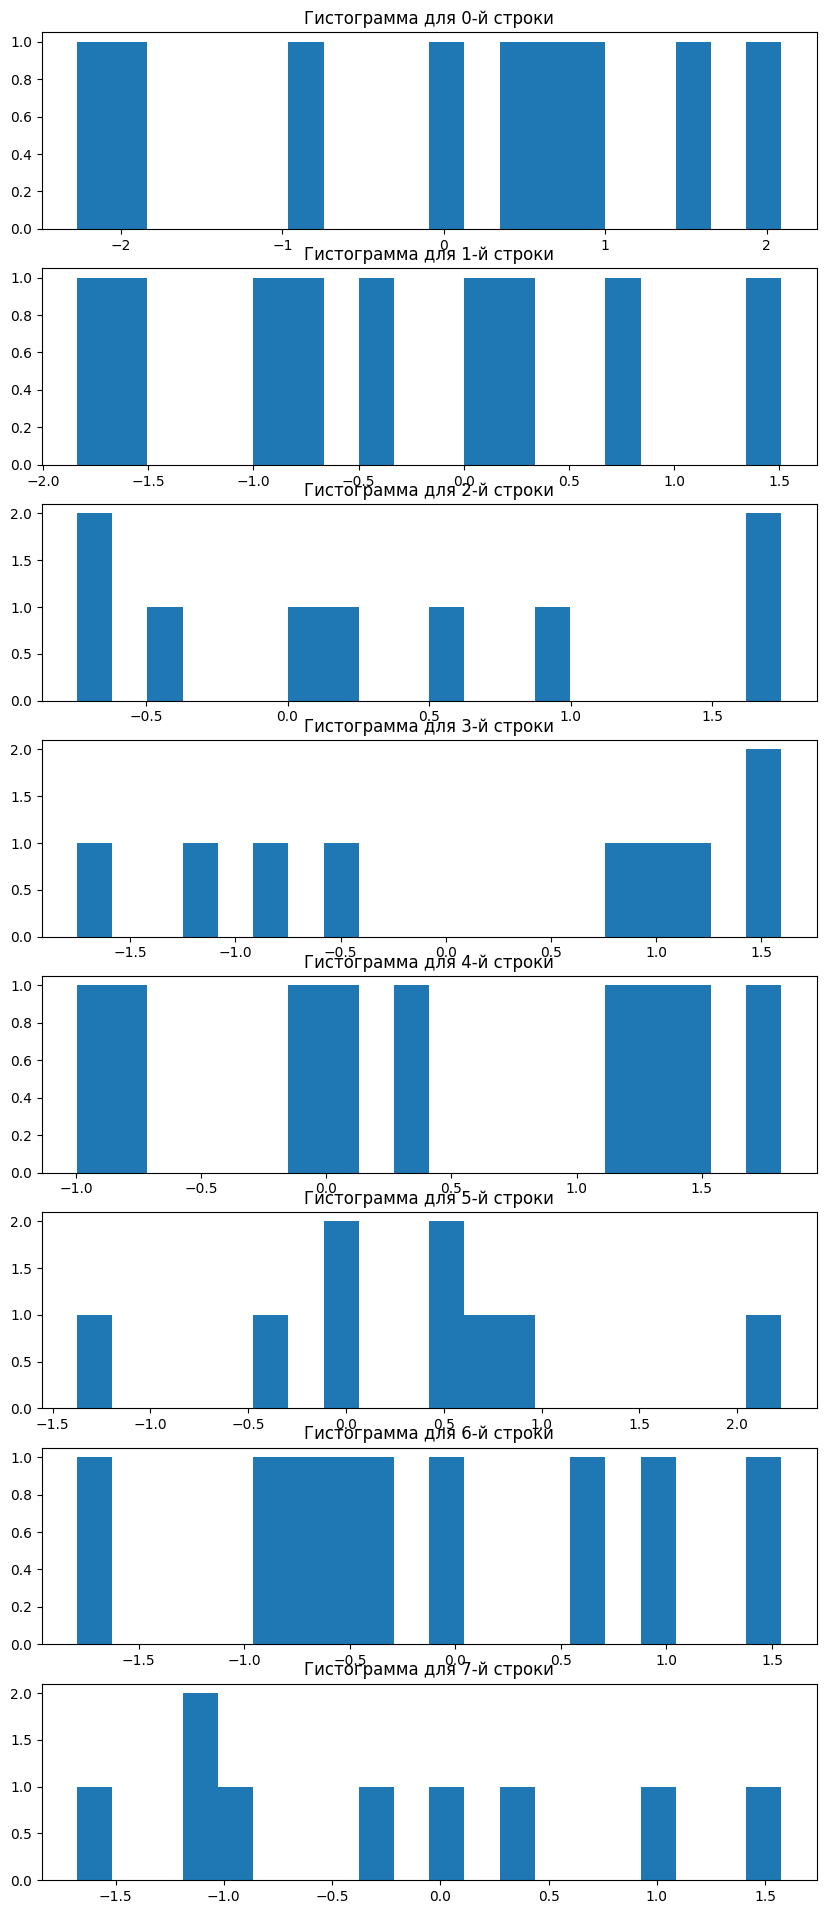

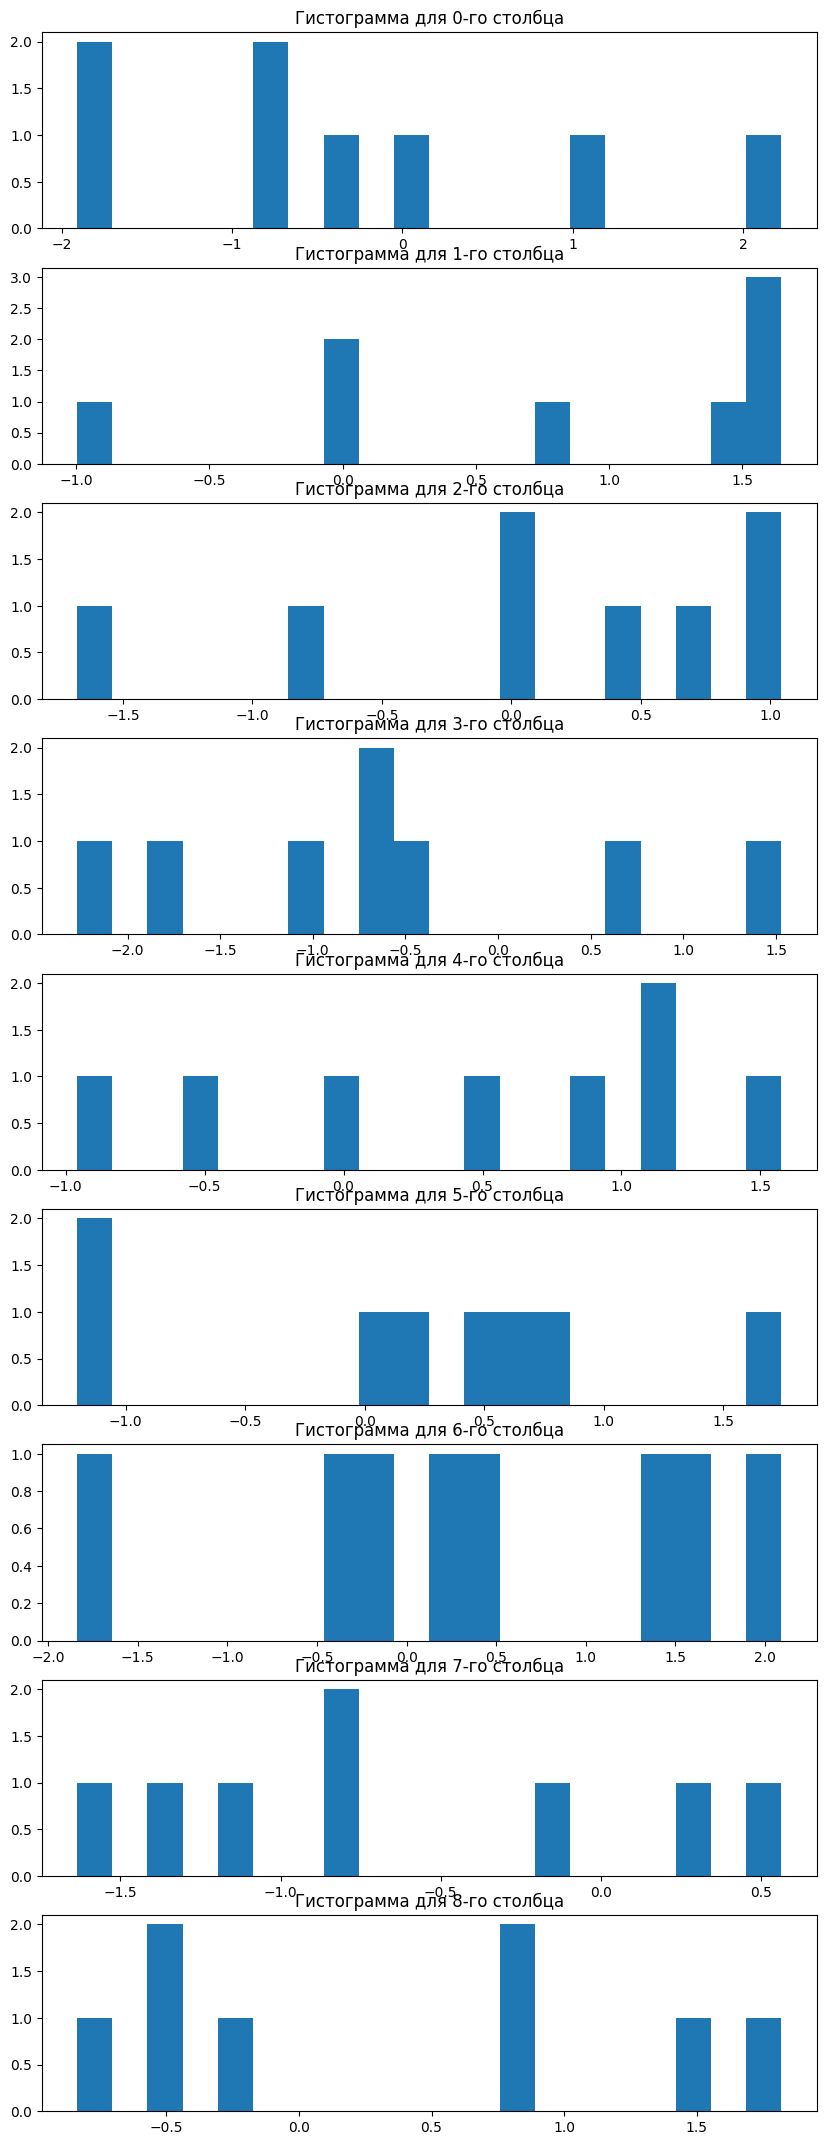

In [18]:

def matrix_stats(m, n):
    matrix = np.random.randn(m, n)

    column_means = np.mean(matrix, axis=0)
    row_means = np.mean(matrix, axis=1)
    column_variances = np.var(matrix, axis=0)
    row_variances = np.var(matrix, axis=1)

    print("Среднее значение по столбцам:", column_means)
    print("Среднее значение по строкам:", row_means)
    print("Дисперсия по столбцам:", column_variances)
    print("Дисперсия по строкам:", row_variances)

    fig, axs = plt.subplots(m, 1, figsize=(10, m*3))
    for i in range(m):
        axs[i].hist(matrix[i, :], bins=20)
        axs[i].set_title(f"Гистограмма для {i}-й строки")

    fig, axs = plt.subplots(n, 1, figsize=(10, n*3))
    for j in range(n):
        axs[j].hist(matrix[:, j], bins=20)
        axs[j].set_title(f"Гистограмма для {j}-го столбца")

    plt.show()

matrix_stats(8, 9)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [38]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n),dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    
    return matrix

# тесты
def test_chess():
    result1 = chess(2, 2, 11, 12)
    expected1 = np.array([[11, 12], [12, 11]])  
    assert np.array_equal(result1, expected1), 'Ошибка в тесте'
    
# запуск тестов
test_chess()
print('Все тесты пройдены')

Все тесты пройдены


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [35]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = Image.new('RGB', (n, m), background_color)
    draw = ImageDraw.Draw(img)
    
    imgbox = ((n - b) // 2, (m - a) // 2,(n + b) // 2, (m + a) // 2)
    
    draw.rectangle(imgbox, fill=rectangle_color)
    
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = Image.new('RGB', (n, m), background_color)
    draw = ImageDraw.Draw(img)
    
    imgbox = ((n - b) // 2, (m - a) // 2,(n + b) // 2, (m + a) // 2)
    draw.ellipse(imgbox, fill=ellipse_color)
    
    return img

# тесты
def test_draw_shapes():
    # тест для прямоугольника
    rectangle_image = draw_rectangle(200, 200, 100, 50, background_color=(0, 0, 255), rectangle_color=(255, 0, 255))
    rectangle_image.show()

    # тест для овала
    ellipse_image = draw_ellipse(100, 200, 50, 30, background_color=(255, 0, 255), ellipse_color=(255, 255, 0))
    ellipse_image.show() 

# запуск тестов
test_draw_shapes()
print('Все тесты пройдены')

Все тесты пройдены


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
def analyze_series(series, window_size):
    mean = np.mean(series)
    var = np.var(series)
    std = np.std(series)
    
    local_maxima = []
    local_minima = []
    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append(i)
    moving_avg = np.convolve(series, np.ones(window_size) / window_size, mode='valid')  
    return mean, var, std, local_maxima, local_minima, moving_avg

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [39]:
def one_hot_encoding(vecotr):
    num_classes = max(vecotr) + 1
    
    encoded_vector = np.zeros((len(vecotr), num_classes), dtype=int)
    
    for i, vector in enumerate(vecotr):
        encoded_vector[i][vector] = 1
        
    return encoded_vector

vector = [0, 2, 3, 0]
encoded = one_hot_encoding(vector)
print(encoded)

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
